In [1]:
# Author and date
import datetime, getpass
user = getpass.getuser()
print(user, datetime.datetime.today())

ubuntu 2020-04-15 22:05:10.722161


In [2]:
user = 'dimitri'  # the system user was different from database user

In [3]:
%matplotlib inline

In [4]:
import datajoint as dj
schema = dj.schema(f'{user}_university')
schema.spawn_missing_classes()

Connecting dimitri@db.data-science-ust.net:3306


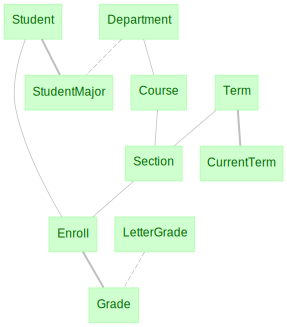

In [5]:
dj.Diagram(schema)

# Generate fake data

In [6]:
# Cleanup from previous run
Department.delete()
Student.delete()
LetterGrade.delete()
Term.delete()

About to delete:
`dimitri_university`.`enroll`: 1320 items
`dimitri_university`.`section`: 2593 items
`dimitri_university`.`course`: 45 items
`dimitri_university`.`student_major`: 2243 items
`dimitri_university`.`department`: 4 items
Proceed? [yes, No]: yes
Committed.
About to delete:
`dimitri_university`.`student`: 3000 items
Proceed? [yes, No]: yes
Committed.
About to delete:
`dimitri_university`.`letter_grade`: 11 items
Proceed? [yes, No]: yes
Committed.
About to delete:
`dimitri_university`.`current_term`: 1 items
`dimitri_university`.`term`: 60 items
Proceed? [yes, No]: yes
Committed.


In [7]:
from tqdm import tqdm
import faker
import random
import itertools
import datetime
fake = faker.Faker()

## Students

In [8]:
def yield_students():
    fake_name = {'F': fake.name_female, 'M': fake.name_male}
    while True:  # ignore invalid values
        try:
            sex = random.choice(('F', 'M'))
            first_name, last_name = fake_name[sex]().split(' ')[:2]
            street_address, city = fake.address().split('\n')
            city, state = city.split(', ')
            state, zipcode = state.split(' ')            
        except ValueError:
            continue
        else:
            yield dict(
                first_name=first_name,
                last_name=last_name,
                sex=sex,
                home_address=street_address,
                home_city=city,
                home_state=state,
                home_zip=zipcode,
                date_of_birth=str(
                    fake.date_time_between(start_date="-35y", end_date="-15y").date()),
                home_phone = fake.phone_number()[:20])

In [9]:
Student.insert(
    dict(k, student_id=i) for i, k in zip(range(1000,2500), yield_students()))

In [10]:
Student()

student_id university-wide ID number,first_name,last_name,sex,date_of_birth,home_address mailing street address,home_city mailing address,home_state US state acronym: e.g. OH,home_zip zipcode e.g. 93979-4979,home_phone e.g. 414.657.6883x0881
1000,Wanda,Carroll,F,1985-07-25,9195 Gardner Pass Apt. 022,West Kristymouth,CA,74637,381.489.3320
1001,Kenneth,Nichols,M,1987-11-14,944 Edward Key,New Scott,NE,07592,(886)147-8518x811
1002,Tonya,Miller,F,1991-09-03,992 Garcia Views Apt. 842,Laurenfurt,NY,35757,+1-337-305-2467x146
1003,Jeffrey,Myers,M,1990-04-07,2868 Joy View,Robbinsport,WA,15148,(002)377-2824
1004,Lydia,Moore,F,1991-05-30,287 Kyle Villages Apt. 301,Davidfurt,MN,10790,(492)987-6780
1005,Wendy,Pearson,F,1997-04-21,240 Johnson Divide Suite 448,Josephborough,SC,53272,373-004-8559
1006,Brent,Waters,M,1988-11-10,579 Rivera Brooks Apt. 927,South Tamitown,WY,28256,132-632-7976x2068
1007,Daniel,Cox,M,1999-08-31,36108 Catherine Prairie,Brenttown,TX,32106,993-659-6440
1008,Thomas,Anderson,M,1987-05-18,445 Jensen Motorway Suite 904,South Michaelhaven,MT,45418,+1-534-394-8381x2041
1009,Sarah,Lawrence,F,2000-05-22,27024 Wood Loaf Apt. 415,South Jasonland,HI,35878,(186)281-5319x653


## Departments, majors, and courses

In [11]:
Department.insert(
    dict(dept=dept, 
         dept_name=name, 
         dept_address=fake.address(), 
         dept_phone=fake.phone_number()[:20])
    for dept, name in [
        ["CS", "Computer Science"],
        ["BIOL", "Life Sciences"],
        ["PHYS", "Physics"],
        ["MATH", "Mathematics"]])

In [12]:
StudentMajor.insert({**s, **d, 
                     'declare_date':fake.date_between(start_date=datetime.date(1999,1,1))}
    for s, d in zip(Student.fetch('KEY'), random.choices(Department.fetch('KEY'), k=len(Student())))
                   if random.random() < 0.75)

In [13]:
StudentMajor()

student_id university-wide ID number,"dept abbreviated department name, e.g. BIOL",declare_date when student declared her major
1000,BIOL,2002-09-30
1001,CS,1999-06-29
1002,CS,2003-05-16
1003,BIOL,2020-02-13
1004,PHYS,2002-10-21
1005,BIOL,2000-08-21
1008,MATH,2005-09-12
1009,PHYS,1999-09-09
1010,MATH,2019-08-22
1011,CS,2015-04-29


In [14]:
# from https://www.utah.edu/
Course.insert([
    ['BIOL', 1006, 'World of Dinosaurs', 3],
    ['BIOL', 1010, 'Biology in the 21st Century', 3],
    ['BIOL', 1030, 'Human Biology', 3],
    ['BIOL', 1210, 'Principles of Biology', 4],
    ['BIOL', 2010, 'Evolution & Diversity of Life', 3],
    ['BIOL', 2020, 'Principles of Cell Biology',  3],
    ['BIOL', 2021, 'Principles of Cell Science',  4],
    ['BIOL', 2030, 'Principles of Genetics',  3],
    ['BIOL', 2210, 'Human Genetics',3],
    ['BIOL', 2325, 'Human Anatomy', 4],
    ['BIOL', 2330, 'Plants & Society', 3],
    ['BIOL', 2355, 'Field Botany', 2],
    ['BIOL', 2420, 'Human Physiology', 4],

    ['PHYS', 2040, 'Classcal Theoretical Physics II', 4],
    ['PHYS', 2060, 'Quantum Mechanics', 3],
    ['PHYS', 2100, 'General Relativity and Cosmology', 3],
    ['PHYS', 2140, 'Statistical Mechanics', 4],
    
    ['PHYS', 2210, 'Physics for Scientists and Engineers I', 4], 
    ['PHYS', 2220, 'Physics for Scientists and Engineers II', 4],
    ['PHYS', 3210, 'Physics for Scientists I (Honors)', 4],
    ['PHYS', 3220, 'Physics for Scientists II (Honors)', 4],
    
    ['MATH', 1250, 'Calculus for AP Students I', 4],
    ['MATH', 1260, 'Calculus for AP Students II', 4],
    ['MATH', 1210, 'Calculus I', 4],
    ['MATH', 1220, 'Calculus II', 4],
    ['MATH', 2210, 'Calculus III', 3],
 
    ['MATH', 2270, 'Linear Algebra', 4],
    ['MATH', 2280, 'Introduction to Differential Equations', 4],
    ['MATH', 3210, 'Foundations of Analysis I', 4],
    ['MATH', 3220, 'Foundations of Analysis II', 4],
    
    ['CS', 1030, 'Foundations of Computer Science', 3],
    ['CS', 1410, 'Introduction to Object-Oriented Programming', 4],
    ['CS', 2420, 'Introduction to Algorithms & Data Structures', 4],
    ['CS', 2100, 'Discrete Structures', 3],
    ['CS', 3500, 'Software Practice', 4],
    ['CS', 3505, 'Software Practice II', 3],
    ['CS', 3810, 'Computer Organization', 4],
    ['CS', 4400, 'Computer Systems', 4],
    ['CS', 4150, 'Algorithms', 3],
    ['CS', 3100, 'Models of Computation', 3],
    ['CS', 3200, 'Introduction to Scientific Computing', 3],
    ['CS', 4000, 'Senior Capstone Project - Design Phase', 3],
    ['CS', 4500, 'Senior Capstone Project', 3],
    ['CS', 4940, 'Undergraduate Research', 3],
    ['CS', 4970, 'Computer Science Bachelor''s Thesis', 3]])

## Terms and course sections

In [15]:
Term.insert(dict(term_year=year, term=term) 
            for year in range(1999, 2019) 
            for term in ['Spring', 'Summer', 'Fall'])

Term().fetch(order_by=('term_year DESC', 'term DESC'), as_dict=True, limit=1)[0]

CurrentTerm().insert1({
    **Term().fetch(order_by=('term_year DESC', 'term DESC'), as_dict=True, limit=1)[0]})

def make_section(prob):
    for c in (Course * Term).proj():
        for sec in 'abcd':
            if random.random() < prob:
                break
            yield {
                **c, 'section': sec, 
                'auditorium': random.choice('ABCDEF') + str(random.randint(1,100))}   

Section.insert(make_section(0.5))

In [16]:
Section()

"dept abbreviated department name, e.g. BIOL","course course number, e.g. 1010",term_year,term,section,auditorium
BIOL,1006,1999,Summer,a,C33
BIOL,1006,2000,Summer,a,B60
BIOL,1006,2000,Summer,b,C63
BIOL,1006,2000,Fall,a,B84
BIOL,1006,2001,Summer,a,F12
BIOL,1006,2001,Summer,b,C39
BIOL,1006,2001,Summer,c,E66
BIOL,1006,2001,Summer,d,E98
BIOL,1006,2001,Fall,a,B100
BIOL,1006,2001,Fall,b,D57


In [17]:
LetterGrade.insert([
    ['A',  4.00],
    ['A-', 3.67],
    ['B+', 3.33],
    ['B',  3.00],
    ['B-', 2.67],
    ['C+', 2.33],
    ['C',  2.00],
    ['C-', 1.67],
    ['D+', 1.33],
    ['D',  1.00],
    ['F',  0.00]])

## Enrollment and grades

In [18]:
terms = Term().fetch('KEY')
quit_prob = 0.1
for student in tqdm(Student.fetch('KEY')):
    start_term = random.randrange(len(terms))
    for term in terms[start_term:]:
        if random.random() < quit_prob:
            break
        else:
            sections = ((Section & term) - (Course & (Enroll & student))).fetch('KEY')
            if sections:
                Enroll.insert({**student, **section} for section in 
                              random.sample(sections, random.randrange(min(5, len(sections)))))

100%|██████████| 1500/1500 [04:27<00:00,  5.60it/s]


In [19]:
Enroll()

student_id university-wide ID number,"dept abbreviated department name, e.g. BIOL","course course number, e.g. 1010",term_year,term,section
1000,BIOL,2210,2008,Summer,c
1000,CS,1410,2008,Summer,a
1000,CS,3100,2008,Spring,b
1000,MATH,1210,2008,Summer,d
1000,PHYS,2100,2008,Spring,d
1000,PHYS,2210,2008,Spring,c
1000,PHYS,3210,2008,Summer,a
1001,BIOL,2330,2015,Summer,b
1001,CS,3810,2015,Summer,a
1001,CS,4150,2015,Summer,a


In [20]:
from matplotlib import pyplot as plt

In [28]:
q = Student.aggr(Enroll, n='count(*)').fetch('n')

Text(0, 0.5, '# students')

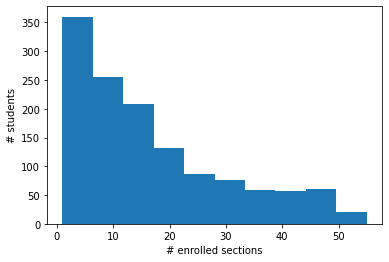

In [29]:
plt.hist(q)
plt.xlabel('# enrolled sections')
plt.ylabel('# students')

In [31]:
# assign random grades
grades = LetterGrade.fetch('grade')

In [32]:
grade_keys = Enroll.fetch('KEY')
random.shuffle(grade_keys)
grade_keys = grade_keys[:len(grade_keys)*9//10]

In [33]:
Grade.insert({**key, 'grade':grade} 
             for key, grade in zip(grade_keys, random.choices(grades, k=len(grade_keys))))

In [34]:
Grade()

student_id university-wide ID number,"dept abbreviated department name, e.g. BIOL","course course number, e.g. 1010",term_year,term,section,grade
1005,BIOL,2420,2008,Summer,a,A
1006,BIOL,2021,2008,Summer,a,A
1006,CS,3200,2007,Spring,b,A
1007,BIOL,2330,2004,Summer,c,A
1007,CS,3200,2004,Summer,a,A
1008,BIOL,2030,2015,Fall,a,A
1009,PHYS,2140,2005,Fall,d,A
1012,CS,2420,2014,Fall,a,A
1012,PHYS,3210,2014,Spring,b,A
1013,BIOL,1030,2015,Spring,a,A


In [36]:
# grade distribution 
dj.U('grade').aggr(Grade, n='count(*)')

grade,n calculated attribute
A,1803
A-,1790
B,1871
B+,1762
B-,1792
C,1835
C+,1776
C-,1797
D,1781
D+,1803
